In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from collections import Counter
import seaborn as sns

sns.set_theme()
sns.set_context("paper")
sns.set_palette("colorblind")

colors = sns.color_palette("colorblind")


In [2]:
# Loading in SOPHIE Data
sophie80df = pd.read_csv("Data/SOPHIE_EPT80_1990-2022.csv", low_memory=False)
sophie80df['Date_UTC'] = pd.to_datetime(sophie80df['Date_UTC'])
sophie80df = sophie80df[sophie80df['Date_UTC'].between('1996','2022')].reset_index(drop=True)
sophie80df['Duration'] = np.append(np.diff(sophie80df['Date_UTC']), np.array([pd.to_timedelta(0,'h')],dtype=np.timedelta64))
sophie80df['Delbay'] = pd.to_numeric(sophie80df['Delbay'],errors='coerce')
sophie80df = sophie80df[sophie80df['Date_UTC'].between('1996','2014')]

array = np.zeros(len(sophie80df['Date_UTC']),dtype=int)
for i, __ in sophie80df.iloc[2:-2].iterrows():
    if (sophie80df.iloc[i-1]['Phase']==1) and (sophie80df.iloc[i]['Phase']==2) and (sophie80df.iloc[i]['Flag']==0) and (sophie80df.iloc[i+1]['Phase']==3):# and (sophie80df.iloc[i+2]['Phase']==1):
        array[i] = 1
        continue
    if (sophie80df.iloc[i-1]['Phase']==3) and (sophie80df.iloc[i-1]['Flag']==0) and (sophie80df.iloc[i]['Phase'] == 2) and (sophie80df.iloc[i]['Flag']==0) and (sophie80df.iloc[i+1]['Phase'] == 3):
        array[i] = 2
        continue
    else:
        array[i] = 0
        continue
array[0] = 1
sophie80df['Type'] = array


(0.0, 10.0)

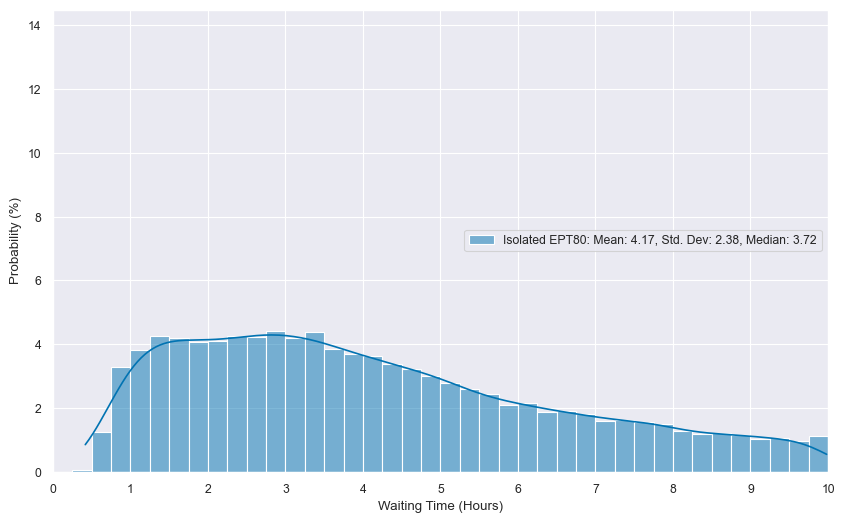

In [16]:
Isolated_Onsets = sophie80df[sophie80df['Type']==1]
isolated_wt_array = np.diff(Isolated_Onsets['Date_UTC'])/pd.to_timedelta('1h')
isolated_wt_array_cut = isolated_wt_array[isolated_wt_array<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(isolated_wt_array_cut, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='Isolated EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(isolated_wt_array_cut),np.nanstd(isolated_wt_array_cut),np.nanmedian(isolated_wt_array_cut)),kde=True)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
axes.set_xlim(0,10)


(0.0, 10.0)

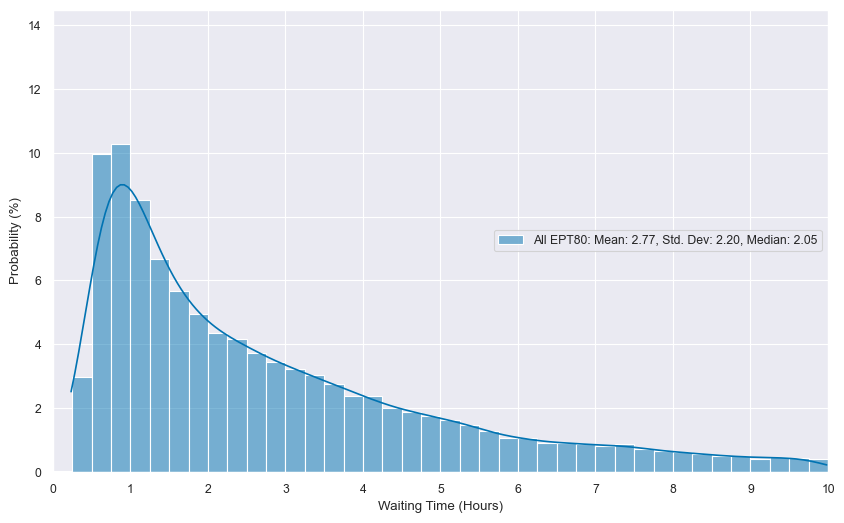

In [17]:
allonsets = sophie80df.iloc[np.intersect1d(np.where(sophie80df['Phase']==2),np.where(sophie80df['Flag']==0))]
allonsets_wt_array = np.diff(allonsets['Date_UTC'])/pd.to_timedelta('1h')
allonsets_wt_array_cut = allonsets_wt_array[allonsets_wt_array<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(allonsets_wt_array_cut, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='All EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(allonsets_wt_array_cut),np.nanstd(allonsets_wt_array_cut),np.nanmedian(allonsets_wt_array_cut)),kde=True)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
axes.set_xlim(0,10)